# Supervised Machine Learning by @attzulkafli.

## Using Linear Regression for non-linear relations

Consider the following case.

In [95]:
from sklearn.preprocessing import PowerTransformer

In [1]:
import matplotlib.pyplot as plt

In [7]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.linear_model import LinearRegression

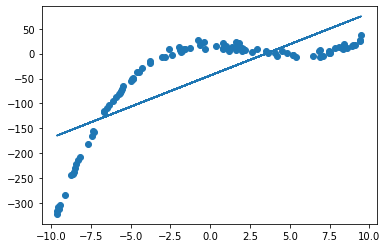

In [8]:
X = (10 * (2 * np.random.rand(100) - 1))[:, np.newaxis]
# b0 = 15, b1 = 0, b2 = -1.7, b3 = 0.2
y = 15 - 1.7 * X**2 + 0.2 * X**3 + np.random.normal(scale=5, size=X.shape)

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred);

### Basis functions

A trick to adapt linear regression to nonlinear relationships between features and targets is to transform the data and generate new features from the existing ones using basis functions. A very common set of basis functions are **polynomial basis functions** $f_n(x) = x^n$, which transform a simple linear regression from

$$ y = \beta_0 + \beta_1 x $$

into

$$ y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \ldots + \beta_n x^n$$

We are free to choose how many polynomials to include. In fact, the basis functions $f(x)$ can be practically anything; we are free to transform features however we deem necessary.

This can, of course, also be extended to multiple linear regression so that, e.g.

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 $$

could become

$$ y = \beta_0 + \beta_{1a} x_1 + \beta_{1b} x_1^2 + \beta_{2a} x_2 + \beta_{2b} x_2^2$$
 
Note that this is still a linear model. Linearity in the context of modelling means that the coefficients $\beta_i$ are only ever added to (or subtracted from) each other. The basis functions $f(x)$ may very well be non-linear, though. For example,

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 $$

is a linear model, despite the $x_1 x_2$ term, whereas

$$ y = \beta_0 + \frac{\beta_1 x}{\beta_2 + x}$$

is a non-linear model, despite only having one feature, because the coefficients are divided by each other.

**All we are doing is engineering new features to capture nonlinear patterns!**

### Regression with polynomial basis functions

The polynomial basis functions are so common and useful that this transformation is built into Scikit-Learn.

In [9]:
x_1d = np.array([2, 3, 4])[:, np.newaxis]
x_1d


array([[2],
       [3],
       [4]])

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
poly = PolynomialFeatures(degree=4, include_bias=False)
poly.fit(x_1d)
x_poly = poly.transform(x_1d)
x_poly

array([[  2.,   4.,   8.,  16.],
       [  3.,   9.,  27.,  81.],
       [  4.,  16.,  64., 256.]])

In [13]:
poly = PolynomialFeatures(degree=4, include_bias=True)
poly.fit(x_1d)
x_poly = poly.transform(x_1d)
x_poly

array([[  1.,   2.,   4.,   8.,  16.],
       [  1.,   3.,   9.,  27.,  81.],
       [  1.,   4.,  16.,  64., 256.]])

In [14]:
from sklearn.pipeline import make_pipeline

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
poly_pipeline = make_pipeline(PolynomialFeatures(degree=3, include_bias=False),MinMaxScaler(),LinearRegression())
poly_pipeline

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('minmaxscaler', MinMaxScaler()),
                ('linearregression', LinearRegression())])

In [19]:
poly_pipeline.steps

[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=False)),
 ('minmaxscaler', MinMaxScaler()),
 ('linearregression', LinearRegression())]

We can use the pipeline as a single object to fit the non-linear relationship from above.

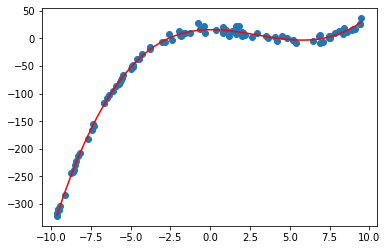

In [20]:
poly_pipeline.fit(X, y)
X_pred = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
y_pred = poly_pipeline.predict(X_pred)
plt.scatter(X, y)
plt.plot(X_pred, y_pred, c='red');

### A comment on `PolynomialFeatures`
The `PolynomialFeatures` preprocessor doesn't just apply exponents to features but also looks at interaction terms $x_i^n x_j^m$. For example, applying `PolynomialFeatures(degree=2)` to the following linear model:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 $$

will result in:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1^2 + \beta_4 x_2^2 + \beta_5 x_1 x_2$$

`PolynomialFeatures` will generate all interaction terms where the sum of the exponents is less than or equal to `degree`. So applying `PolynomialFeatures(degree=3)` to the linear model above results in:

$$ 
\begin{aligned}
y = \beta_0 &+ \beta_1 x_1 + \beta_2 x_2\\
            &+ \beta_3 x_1^2 + \beta_4 x_2^2\\
            &+ \beta_5 x_1 x_2\\
            &+ \beta_6 x_1^3 + \beta_7 x_2^3\\
            &+ \beta_7 x_1^2 x_2 + \beta_8 x_2^2 x_1\\
\end{aligned}
$$

Keep this in mind when generating polynomial expansions: the number of resulting features can become computationally problematic if `degree` is too large. For example, if we start with 10 features, a polynomial expansion with `degree=4` will result in 1000 features:

In [21]:
x_1d = np.random.randint(low=-5, high=5, size=(5, 10))
x_1d

array([[ 3, -5, -3, -2,  2,  3,  0, -3,  1, -4],
       [-5,  4, -5, -4, -5, -2,  1, -2, -1,  0],
       [ 1,  2, -4,  1, -3,  1, -1, -1, -4, -1],
       [ 3,  4,  4,  0, -5, -3, -1,  2,  1, -3],
       [-2,  1, -2,  2, -1,  2,  1,  4,  2, -2]])

In [22]:
x_1d.shape

(5, 10)

In [23]:
x_poly = PolynomialFeatures(degree=4).fit_transform(x_1d)
x_poly.shape

(5, 1001)

In [24]:
x_1d = np.random.randint(low=-5, high=5, size=(5, 10))
x_poly = PolynomialFeatures(degree=4).fit_transform(x_1d)
print("Original shape:    {}".format(x_1d.shape))
print("Transformed shape: {}".format(x_poly.shape))

# set interaction_only = True only creates x_i * x_j for i != j
x_poly_inter = PolynomialFeatures(degree=4, interaction_only = True).fit_transform(x_1d)
print("Interaction Only Transformed shape: {}".format(x_poly_inter.shape))

Original shape:    (5, 10)
Transformed shape: (5, 1001)
Interaction Only Transformed shape: (5, 386)


## Best Practice for Machine Learning
In the previous examples and exercises, we have assessed the performance of the trained model on the data it was trained on. This is problematic, as we have no guarantee that the model will capture the true relationship between the features and target values. Consider the following example:

<center><img src="../images/overfitting.png" /></center>

The black dots represent the raw input data and the two lines represent two models trained on this data.

- The blue line perfectly predicts the target value for each data point. This model has a perfect performance, i.e. $R^2 = 1$, when assessed on the training data. However, it clearly does not capture the true relationship between the feature and the target value.
- The black line, although not a perfect fit, i.e. $R^2 < 1$, much more accurately describes the true relationship between feature and target.

To avoid this phenomenon, called **overfitting**, we can split our data into a training and a test data set. This allows us to train the model on one part of the data and then assess its performance on data it has never seen to determine how well it generalizes to new data.

We can use the `sklearn.model_selection.train_test_split` function to divide the data into 2 sets for us. 

In [8]:
from sklearn.model_selection import train_test_split

# Generate random data
rng = np.random.RandomState(42)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.]) + np.random.randn(100)

In [32]:
print("X.shape", X.shape)
print("y.shape", y.shape)

X.shape (100, 3)
y.shape (100,)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [34]:
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (75, 3)
y_train.shape (75,)
X_test.shape (25, 3)
y_test.shape (25,)


In [35]:
model = LinearRegression().fit(X_train, y_train)
print("Intercept: {}".format(model.intercept_))
print("Slope:     {}".format(model.coef_))

Intercept: 0.16434636606049358
Slope:     [ 1.50907329 -1.99217103  1.06626408]


In [174]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train R2 Score: {}".format(r2_train))
print("Test R2 Score:  {}".format(r2_test))

Train R2 Score: 0.9856224019215895
Test R2 Score:  0.9738315278503855


### train-test split in one cell

In [175]:
# Generate random data
rng = np.random.RandomState(42)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.]) + np.random.randn(100)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
model = LinearRegression().fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Intercept: {}".format(model.intercept_))
print("Slope:     {}".format(model.coef_))
print("Train R2 Score: {}".format(r2_train))
print("Test R2 Score:  {}".format(r2_test))

X.shape (100, 3)
y.shape (100,)
X_train.shape (75, 3)
y_train.shape (75,)
X_test.shape (25, 3)
y_test.shape (25,)
Intercept: 0.7910543974829567
Slope:     [ 1.47925651 -1.99290372  0.92413227]
Train R2 Score: 0.9878030324500066
Test R2 Score:  0.9707588434928615


### Exercise - Train and test the advertising dataset

Train a multiple linear regression on the advertising dataset as above, but this time reserve a fraction of the data as a test set to assess the performance. Do this with the following splits:
- Training: 50%, Test: 50%
- Training 95%, Test: 5%
- Training 5%, Test: 95%

Hint: The `test_size` argument of `train_test_split` takes a number between 0 and 1 indicating the relative size of the test set, e.g. 0.3 corresponds to "Reserve 30% of the data as a test set"

In [7]:
from sklearn.metrics import r2_score

In [181]:
X = sales[["TV", "radio", "newspaper"]]
y = sales["sales"]

In [38]:
#Training: 50%, Test: 50%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

model = LinearRegression().fit(X_train, y_train)

r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))

print("=== Test Size 50% ===")
print("   R2 Train: {:.3f}".format(r2_train))
print("   R2 Test:  {:.3f}".format(r2_test))
print("=====================")    

=== Test Size 50% ===
   R2 Train: 0.984
   R2 Test:  0.984


In [39]:
#Training 95%, Test: 5%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=101)

model = LinearRegression().fit(X_train, y_train)

r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))

print("=== Test Size 50% ===")
print("   R2 Train: {:.3f}".format(r2_train))
print("   R2 Test:  {:.3f}".format(r2_test))
print("=====================")    

=== Test Size 50% ===
   R2 Train: 0.984
   R2 Test:  0.970


In [40]:
#Training 5%, Test: 95%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=101)

model = LinearRegression().fit(X_train, y_train)

r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))

print("=== Test Size 50% ===")
print("   R2 Train: {:.3f}".format(r2_train))
print("   R2 Test:  {:.3f}".format(r2_test))
print("=====================")    

=== Test Size 50% ===
   R2 Train: 0.997
   R2 Test:  0.837


## Explore sklearns datasets

Sklearn provides both toy as well as real-world datasets: https://scikit-learn.org/stable/datasets/index.html.

We can load these with the built-in `sklearn.datasets.load_*()` or `sklearn.datasets.fetch_*()` functions. Python will download these datasets if they are not already saved locally.

In [44]:
import sklearn.datasets

In [45]:
diabetes = sklearn.datasets.load_diabetes()

In [46]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [49]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

**Exercise - Boston Housing Data**

We're going to predict housing prices

1. Load the sklearn dataset of the Boston house prices. 


In [43]:
import pandas as pd
import numpy as np

In [45]:
#change scikit learn dataset o pd dataframe
#alternative
from sklearn import datasets
import pandas as pd

boston_data = datasets.load_boston()
boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston['target'] = pd.Series(boston_data.target)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [112]:
boston = sklearn.datasets.load_boston()
print("Keys in Boston dataset: {}".format(boston.keys()))
print(boston.DESCR)

Keys in Boston dataset: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radia

2. Use a multiple linear regression to predict housing prices
    - Divide the data into a training and test data set (70% training/30% test split)
    - Train a multiple linear regression model
    - Assess the performance of the model using the $R^2$ score
    - Play around with the train/test split size to see how the fit changes

In [113]:
X=boston.data
Y=boston.target

In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [17]:
model = LinearRegression().fit(X_train,Y_train)

In [91]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)
print("Train R2 Score: {}".format(r2_score(Y_train, Y_train_pred)))
print("Test R2 Score:  {}".format(r2_score(Y_test, Y_test_pred)))

Train R2 Score: 0.7434997532004697
Test R2 Score:  0.711226005748496


In [92]:
#alternative
model = LinearRegression().fit(X_train, Y_train)
print("R2 train score: {}".format(model.score(X_train, Y_train)))
print("R2 test score: {}".format(model.score(X_test, Y_test)))

R2 train score: 0.7434997532004697
R2 test score: 0.711226005748496


In [98]:

scaler=PowerTransformer().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

LR_boston_scaled = LinearRegression().fit(X_train_scaled, Y_train)
print("R2 train score: {}".format(LR_boston_scaled.score(X_train_scaled, Y_train)))
print("R2 test score: {}".format(LR_boston_scaled.score(X_test_scaled, Y_test)))

R2 train score: 0.7671674226821155
R2 test score: 0.7412232713454907


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


3. Try to improve the regression by using polynomial features
    - Create an sklearn pipeline that generates polynomial features and then trains a multiple linear regression on these features
    - Assess the performance ($R^2$ score) of this polynomial regression on the training and test data
    - Do this for polynomial degrees 2, 3, and 4.
    - Compare your results with the multiple linear regression above. What are your observations?

In [73]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

In [105]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False), 
    MinMaxScaler(), 
    LinearRegression())
poly_pipeline.fit(X_train, Y_train)

print("R2 train score (degree=2): {}".format(poly_pipeline.score(X_train, Y_train)))
print("R2 test score (degree=2): {}".format(poly_pipeline.score(X_test, Y_test)))

R2 train score (degree=2): 0.9469794920108197
R2 test score (degree=2): 0.6610321968877222


In [106]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False), 
    MinMaxScaler(), 
    LinearRegression())
poly_pipeline.fit(X_train, Y_train)

print("R2 train score (degree=3): {}".format(poly_pipeline.score(X_train, Y_train)))
print("R2 test score (degree=3): {}".format(poly_pipeline.score(X_test, Y_test)))

R2 train score (degree=3): 1.0
R2 test score (degree=3): -27.24238218792941


In [107]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=4, include_bias=False), 
    MinMaxScaler(), 
    LinearRegression())
poly_pipeline.fit(X_train, Y_train)

print("R2 train score (degree=4): {}".format(poly_pipeline.score(X_train, Y_train)))
print("R2 test score (degree=4): {}".format(poly_pipeline.score(X_test, Y_test)))

R2 train score (degree=4): 1.0
R2 test score (degree=4): -5.217699556005522


In [114]:
# improve the regression by using polynomial features
#in one cell

X=boston.data
Y=boston.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

model = LinearRegression().fit(X_train,Y_train)

## optional
scaler=PowerTransformer().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
##

LR_boston_scaled = LinearRegression().fit(X_train_scaled, Y_train)
print("R2 train score: {}".format(LR_boston_scaled.score(X_train_scaled, Y_train)))
print("R2 test score: {}".format(LR_boston_scaled.score(X_test_scaled, Y_test)))

poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False), 
    MinMaxScaler(), 
    LinearRegression())
poly_pipeline.fit(X_train, Y_train)

print("R2 train score (degree=2): {}".format(poly_pipeline.score(X_train, Y_train)))
print("R2 test score (degree=2): {}".format(poly_pipeline.score(X_test, Y_test)))



R2 train score: 0.7671674226821155
R2 test score: 0.7412232713454907
R2 train score (degree=2): 0.9469794920108197
R2 test score (degree=2): 0.6610321968877222


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


# Lasso, Ridge, and Elastic Net Regression: Regularization

Ridge and Lasso regression are powerful techniques generally used for creating parsimonious models in presence of a ‘large’ number of features. Here ‘large’ can typically mean either of two things:

- Large enough to enhance the tendency of a model to overfit (as low as 10 variables might cause overfitting)
- Large enough to cause computational challenges. With modern systems, this situation might arise in case of millions or billions of features

Generally, they work by penalizing the magnitude of coefficients of features along with minimizing the error between predicted and actual observations. These are called ‘regularization’ techniques. Regularization reduces the model complexity and prevents over-fitting. The key difference is in how they assign penalty to the coefficients:

**Regression:**

$$\hat{y} = \beta_0 + \beta_1  x_1 + \beta_2  x_2 + ... + \beta_n  x_n $$

- Minimize Error: $$\sum_{i=1}^{m} {(y - \hat{y})^2} = \sum_{i=1}^{m} {(y -  \beta_0 + \beta_1  x_1 + \beta_2  x_2 + ... + \beta_n  x_n )^2}$$

**Lasso Regression:**

**LASSO** stands for ``Least Absolute Shrinkage and Selection Operator`` where emphasis on the 2 key words – ‘absolute‘ and ‘selection‘.

Lasso regression performs **L1 regularization**, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. 

- Minimize Error: $$\sum_{i=1}^{m} {(y - \hat{y})^2} + \alpha\sum_{i=1}^{n} {|\beta_i|} = \sum_{i=1}^{m} {(y -  \beta_0 - \beta_1  x_1 - \beta_2  x_2 - ... - \beta_n  x_n )^2} + \alpha\sum_{i=1}^{n} {|\beta_i|}$$

Thus, lasso regression optimizes the following:

**Objective = RSS + α * (sum of absolute value of coefficients)**

Here, α (alpha) works similar to that of ridge and provides a trade-off between balancing RSS and magnitude of coefficients. Like that of ridge, α can take various values. Lets iterate it here briefly:

1. α = 0: Same coefficients as simple linear regression
2. α = ∞: All coefficients zero (same logic as before)
3. 0 < α < ∞: coefficients between 0 and that of simple linear regression

**Ridge Regression:**


As mentioned before, ``ridge regression`` performs ‘L2 regularization‘, i.e. it adds a factor of sum of squares of coefficients in the optimization objective.

- Minimize Error: $$\sum_{i=1}^{m} {(y - \hat{y})^2}+ \alpha \sum_{i=1}^{n} {\beta_i^2} = \sum_{i=1}^{m} {(y -  \beta_0 - \beta_1  x_1 - \beta_2  x_2 - ... - \beta_n  x_n )^2} + \alpha \sum_{i=1}^{n} {\beta_i^2}$$

Thus, ridge regression optimizes the following:

**Objective = RSS + α * (sum of square of coefficients)**

Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values:

1. α = 0:
    - The objective becomes same as simple linear regression.
    - We’ll get the same coefficients as simple linear regression.
2. α = ∞:
    - The coefficients will be zero. Why? Because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.
3. 0 < α < ∞:
    - The magnitude of α will decide the weightage given to different parts of objective.
    - The coefficients will be somewhere between 0 and ones for simple linear regression.

**Elastic Net Regression:**

- Minimize Error: $$\sum_{i=1}^{m} {(y - \hat{y})^2}+ \lambda_1 \sum_{i=1}^{n} {|\beta_i|} + \lambda_2 \sum_{i=1}^{n} {\beta_i^2} = \sum_{i=1}^{m} {(y -  \beta_0 - \beta_1  x_1 - \beta_2  x_2 - ... - \beta_n  x_n )^2} + \lambda_1 \sum_{i=1}^{n} {|\beta_i|} + \lambda_2 \sum_{i=1}^{n} {\beta_i^2}$$

In `sklearn`, the relationship between $\lambda_1$ and $\lambda_2$ is defined by two parameters in `ElasticNet` function `alpha` and `l1_ratio` where:
$$\alpha = \lambda_1 + \lambda_2$$
and $$ l1-ratio = \frac {\lambda_1}{(\lambda_1 + \lambda_2)}$$

For example, if $\alpha = 1$, and l1_ratio = 0.3, then:
$$ {\lambda_1 + \lambda_2 = 1} \\ { \frac {\lambda_1}{(\lambda_1 + \lambda_2)} = 0.3}$$
Therefore: 
$$ {\lambda_1 = 0.3} \\  {\lambda_2 = 0.7}$$